(path-analysis-notebook)=
# Visualizzare i modelli di equazioni strutturali 

<!-- https://stats.oarc.ucla.edu/r/seminars/rsem/ -->

In [1]:
# devtools::install_github("alishinski/lavaanPlot")
source("_common.R")
suppressPackageStartupMessages({
    library("lavaan")
    library("semPlot")
    library("lavaanPlot")
    library("DiagrammeRsvg")
    library("rsvg")
})

set.seed(42)
options(repr.plot.width=6, repr.plot.height=6)

Le visualizzazioni sono fondamentali per la comunicazione chiara e sintetica di relazioni complesse tra variabili. In particolare, quando si lavora con modelli di equazioni strutturali (SEM) che rappresentano una rete di relazioni tra variabili manifeste e latenti, i ricercatori utilizzano spesso strumenti grafici per facilitare la specificazione e l'espressione del modello, nonché per presentare i risultati in modo chiaro e comprensibile.

La *path analysis* rappresenta un metodo per decomporre la correlazione o covarianza tra le variabili in componenti specifiche, al fine di descrivere le relazioni tra di esse. Questo approccio si basa sulla rappresentazione grafica delle interrelazioni tra le variabili e sulla scomposizione delle correlazioni o covarianze in termini dei parametri del modello. Wright (1920) è stato il primo a sviluppare i diagrammi di percorso per descrivere i modelli di equazioni strutturali.

## Path diagram

Il path diagram è uno strumento grafico che rappresenta le relazioni tra le variabili di interesse. Nel diagramma, le variabili non osservate o latenti sono rappresentate da un cerchio o ellisse, mentre le variabili osservate sono rappresentate da un quadrato o rettangolo. Ci sono due tipi di variabili rappresentate nel path diagram: quelle che non ricevono effetti causali da altre variabili e quelle che li ricevono. Una variabile esogena è una variabile esterna che agisce solo come variabile indipendente, ovvero causa di un effetto. Una variabile endogena può essere sia effetto di alcune variabili che causa per altre, o può svolgere solo il ruolo di variabile dipendente. Le fonti causali delle variabili endogene sono interne al path diagram, mentre quelle delle variabili esogene sono esterne al diagramma. La distinzione tra variabili esogene e endogene ha delle somiglianze con la distinzione tra variabili indipendenti e dipendenti nei modelli lineari.

Il diagramma del percorso rappresenta le relazioni tra le variabili di interesse, evidenziando i legami causali o associativi tra di esse. Le frecce unidirezionali rappresentano un nesso causale tra le variabili coinvolte: la variabile finale dipende dalla variabile iniziale a cui la freccia è collegata. Al contrario, una freccia curva bidirezionale indica una relazione associativa non causale tra le variabili. L'assenza di una freccia tra due variabili nel diagramma corrisponde all'ipotesi che tali variabili siano incorrelate tra loro. Nella figura seguente, ad esempio, vengono illustrate le relazioni tra nove variabili manifeste e tre variabili latenti.

```{figure} images/path_01.png
---
height: 450px
name: path_01-fig
---
Diagramma di percorso per un modello a tre fattori comuni.
```

## Analisi dei percorsi e regressione bivariata

Iniziamo a descrivere l'analisi dei percorsi partendo dal caso più semplice, quello del modello di regressione lineare. Il modello di regressione bivariata è espresso dalla seguente equazione:

$$
y_1 = b_0 + b_1 x_1 + \epsilon_1
$$

dove $y$ è la variabile dipendente, $b_0$ è l'intercetta, $b_1$ è la pendenza della retta di regressione, $x$ è la variabile indipendente e $\epsilon$ è il residuo. 

Nella descrizione delle relazioni tra variabili manifeste e latenti, spesso viene adottata la notazione LISREL. In tale notazione, il modello presentato in precedenza può essere espresso come segue

$$
y_1 = \alpha + \gamma x_1 + \zeta_1,
$$

dove

- $x_1$: variabile esogena singola
- $y_1$: variabile endogena singola
- $\alpha$: intercetta di $y_1$
- $\gamma_1$: coefficiente di regressione
- $\zeta_1$: residuo di $y_1$
- $\phi$: varianza o covarianza della variabile esogena
- $\psi$: varianza o covarianza residuale della variabile endogena

Il diagramma di percorso per il modello di regressione bivariato è mostrato nella figura seguente.

```{figure} images/lisrel_bivariate_reg.png
---
height: 225px
name: lisrel_bivariate_reg-fig
---
Diagramma di percorso per il modello di regressione bivariato.
```

Facciamo un esempio numerico. Simuliamo tre variabili: x1, x2, y.

In [2]:
set.seed(42)
n <- 100
x1 <- rnorm(n, 90, 20)
x2 <- x1 + rnorm(n, 0, 30)
y <- 25 + 0.5 * x1 + 1.0 * x2 + rnorm(n, 0, 30)

cor(cbind(x1, x2, y))

dat <- data.frame(
    y, x1, x2
)

,x1,x2,y
x1,1.0000000,0.6244502,0.5493286
x2,0.6244502,1.0000000,0.7992614
y,0.5493286,0.7992614,1.0000000


Consideriamo la relazione tra `x1` (variabile endogena) e `y` (variabile endogena). In R possiamo adattare ai dati un modello di regressione mediante la funzione `lm`.

In [3]:
m1a <- lm(y ~ x1, data = dat)
summary(m1a) |>
    print()


Call:
lm(formula = y ~ x1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.462 -29.539  -3.437  29.200 122.234 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.5974    18.9844   1.980   0.0505 .  
x1            1.3286     0.2042   6.508 3.25e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 42.31 on 98 degrees of freedom
Multiple R-squared:  0.3018,	Adjusted R-squared:  0.2946 
F-statistic: 42.35 on 1 and 98 DF,  p-value: 3.251e-09



Usiamo ora lavaan per adattare lo stesso modello ai dati.

In [4]:
m1b <- "
    y ~ 1 + x1
    x1 ~~ x1
"
fit1b <- sem(m1b, data = dat)
parameterEstimates(fit1b) |>
    print()


  lhs op rhs      est      se      z pvalue ci.lower ci.upper
1   y ~1       37.597  18.794  2.001  0.045    0.763   74.432
2   y  ~  x1    1.329   0.202  6.574  0.000    0.933    1.725
3  x1 ~~  x1  429.432  60.731  7.071  0.000  310.402  548.462
4   y ~~   y 1754.100 248.067  7.071  0.000 1267.897 2240.303
5  x1 ~1       90.650   2.072 43.744  0.000   86.589   94.712


L'intercetta di `.y` (37.597) e il coefficiente di regressione di `y ~ x1` (1.329) corrispondono all'output di `lm()` con piccoli errori di arrotondamento. Si noti che il punto (.) davanti al parametro indica una variabile endogena sotto `Intercepts` e una varianza residua se sotto `Variances` o `Covariances`. L'intercetta per `x1` (90.650) non ha un punto (.) né la sua varianza (429.432), indicando che si tratta di una media ed una varianza esogena. La media ed la varianza esogene corrispondono alla media e alla varianza univariate come mostrato di seguito:

In [5]:
mean(dat$x1)

[1] 90.6503

In [6]:
var(dat$x1) * (length(dat$x1) - 1) / length(dat$x1)

[1] 429.432

## Analisi dei percorsi e regressione multipla

<!-- Vi è una stretta relazione tra path analysis e regressione multipla,
tanto che la regressione può essere considerata un caso particolare di
path analysis. Per semplicità, si supponga che le variabili siano state
standardizzate, anche se la stessa analisi può essere condotta per
variabili grezze. Il path diagram mostra la relazione tra tutte le
variabili, comprendendo anche i fattori di disturbo, e fornisce dunque
la rappresentazione grafica di un sistema di equazioni simultanee. Nel
caso di due regressori, il modello di regressione multipla può essere
rappresentato tramite il path diagram riportato nella
figura seguente. -->

La regressione semplice è limitata a una sola variabile esogena. Nella pratica, un ricercatore può essere interessato a studiare come un gruppo di variabili esogene possano predire una variabile di esito. Supponiamo di avere ancora una sola variabile di esito endogena ma due predittori esogeni; questo caso è noto come regressione multipla:

$$
y_1 = \alpha_1 + \gamma_1 x_1 + \gamma_2 x_2 + \zeta_1
$$

Il diagramma di percorso mostra la relazione tra tutte le variabili, comprendendo anche i fattori di disturbo, e fornisce dunque la rappresentazione grafica dell'equazione precedente.

```{figure} images/lisrel_mr.png
---
height: 300px
name: lisrel_mr-fig
---
Diagramma di percorso per il modello di regressione multipla.
```

I coefficienti di percorso associati alle frecce orientate esprimono la portata del nesso causale e corrispondono ai pesi beta (ovvero ai coefficienti parziali di regressione standardizzati). Le frecce non orientate esprimono la portata della pura associazione tra variabili e dunque corrispondono alle correlazioni/covarianze.

In un diagramma di percorso, il numero di equazioni corrisponde al numero di variabili endogene del modello. Nel caso specifico, poiché vi è una sola variabile endogena (ovvero $y$), esiste un'unica equazione che descrive le relazioni causalitiche interne al path diagram. All'interno di ciascuna equazione, inoltre, il numero di termini corrisponde al numero di frecce orientate che puntano verso la variabile endogena. Nell'esempio sopra citato, pertanto, la sola equazione del modello contiene tre termini, ciascuno associato ad una freccia orientata.

Usando `lm` otteniamo la seguente stima dei coefficienti:

In [7]:
m2a <- lm(y ~ 1 + x1 + x2, data = dat)
fit2a <- summary(m2a) |>
    print()


Call:
lm(formula = y ~ 1 + x1 + x2, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-77.299 -19.856  -2.476  19.112  75.617 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  44.4537    13.6639   3.253  0.00157 ** 
x1            0.1991     0.1879   1.060  0.29179    
x2            1.0853     0.1127   9.628 8.54e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.41 on 97 degrees of freedom
Multiple R-squared:  0.643,	Adjusted R-squared:  0.6356 
F-statistic: 87.34 on 2 and 97 DF,  p-value: < 2.2e-16



Gli stessi risultati si ottengono con lavaan.

In [8]:
m2b <- "
    y ~ 1 + x1 + x2
    x1 ~~ x1
    x2 ~~ x2
    x1 ~~ x2
"
fit2b <- sem(m2b, data = dat)
parameterEstimates(fit2b) |>
    print()


  lhs op rhs      est      se      z pvalue ci.lower ci.upper
1   y ~1       44.454  13.457  3.303  0.001   18.078   70.830
2   y  ~  x1    0.199   0.185  1.076  0.282   -0.164    0.562
3   y  ~  x2    1.085   0.111  9.775  0.000    0.868    1.303
4  x1 ~~  x1  429.432  60.731  7.071  0.000  310.402  548.462
5  x2 ~~  x2 1192.840 168.693  7.071  0.000  862.208 1523.472
6  x1 ~~  x2  446.927  84.379  5.297  0.000  281.546  612.307
7   y ~~   y  896.963 126.850  7.071  0.000  648.342 1145.584
8  x1 ~1       90.650   2.072 43.744  0.000   86.589   94.712
9  x2 ~1       88.026   3.454 25.487  0.000   81.257   94.795


La funzione `semPaths` consente di creare un diagramma di percorso a partire dall'oggetto creato da `sem`.

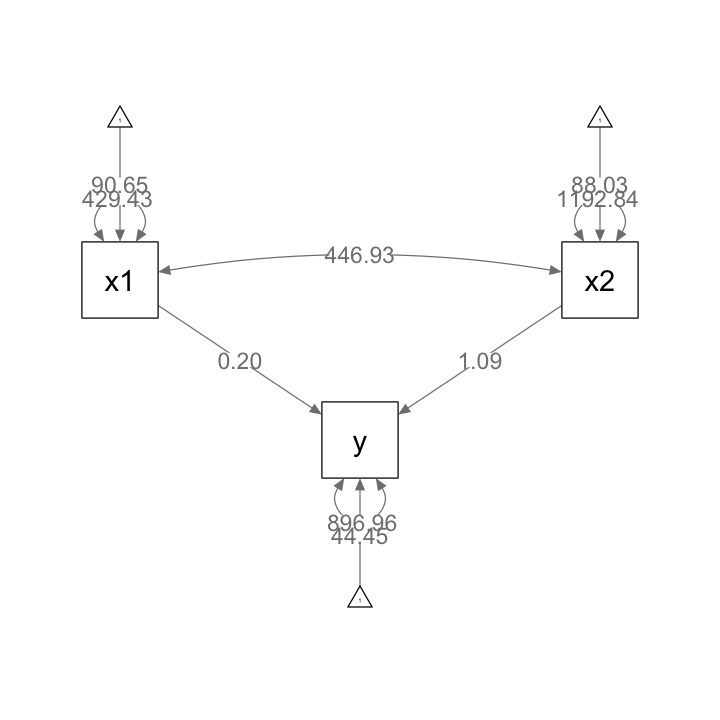

In [9]:
semPaths(
    fit2b,
    whatLabels = "est",
    sizeMan = 10,
    edge.label.cex = 1.15,
    style = "ram",
    nCharNodes = 0, nCharEdges = 0
)


## Effetti diretti e indiretti

La path analysis fornisce un metodo per distinguere tra i diversi tipi di effetti che influenzano le variabili: l'effetto diretto, l'effetto indiretto e l'effetto totale. Gli effetti diretti sono quelli non mediati da altre variabili. Gli effetti indiretti operano attraverso l'intervento di almeno una variabile. L'effetto totale è la somma di tutti gli effetti diretti e indiretti.

Nella figura seguente, la variable $y_1$ ha un effetto diretto sulla $y_2$. La variabile $y_1$ ha un effetto indiretto sulla $y_3$ in quanto non c'è una freccia causale che colleghi direttamente la
variabile $y_1$ alla $y_3$. La variabile $y_1$ è una variabile esogena e le varibili $y_2$ e $y_3$ sono variabili endogene.

```{figure} images/path_03.png
---
height: 100px
name: path_03-fig
---
Diagramma di percorso per un modello a catena.
```

## Le regole di Wright

Lo scopo della path analysis è quello di decomporre la correlazione (o la covarianza) nei termini della somma di tutti i percorsi (diretti e indiretti) che legano le due variabili tramite i coefficienti detti path coefficients. Usando il path diagram, Sewall Wright (1921, 1934) enunciò le regole che, attraverso le cosiddette tracing rules, legano le correlazioni (o covarianze) delle variabili ai parametri del modello. Le tracing rules possono essere espresse nei termini seguenti:

- è possibile procedere prima all’indietro lungo una freccia e poi in avanti, seguendo la direzione di una freccia, ma non si può andare prima avanti e poi tornare indietro;
- un percorso composto non deve transitare due volte per la stessa variabile (non devono esserci loop);
- un percorso non può comprendere più di una linea curva.

Si chiama “percorso” il tracciato che unisce due variabili; è costituito da sequenze di frecce direzionali e di curve non direzionali. A ciascun percorso legittimo (ovvero, che soddisfa le regole di Wright) viene assegnato un valore numerico pari al prodotto dei coefficienti incontrati sul percorso medesimo. I coefficienti di percorso possono essere o coefficienti parziali di regressione standardizzati, se il legame ha una direzione, oppure coefficienti di correlazione, se il legame è bidirezionale.

## Scomposizione delle correlazioni/covarianze

Il principio di base è stato espresso da Sewall Wright (1934) nel modo seguente: 

> Any correlation between variables in a network of sequential relations can be analyzed into contributions from all the paths (direct or through common factors) by which the two variables are connected, such that the value of each contribution is the product of the coefficients pertaining to the elementary paths. If residual correlations are present (represented by bidirectional arrows) one (but never more than one) of the coefficients thus multiplied together to give the contribution of the connecting path, may be a correlation coefficient. The others are all path coefficients.

Possiamo così enunciare la regola di scomposizione della correlazione: la correlazione o covarianza tra due variabili può essere scomposta in tanti termini quanti sono i percorsi che le collegano, dove ciascun termine è dato dal prodotto dei coefficienti delle variabili incontrati lungo il percorso. In altre parole, si può decomporre la correlazione o covarianza tra due variabili in tanti contributi quanti sono i cammini possibili che connettono le due variabili.

### Scomposizione della varianza

La varianza di una variabile endogena può essere suddivisa in una parte spiegata dalle variabili che influenzano causalmente tale variabile e in una parte non spiegata. La varianza spiegata è determinata dalla somma degli effetti delle varie variabili che si collegano alla variabile endogena rispettando le regole di tracciamento di Wright. Il numero degli addendi corrisponde al numero di percorsi che connettono la variabile endogena a sé stessa.

**Esempio.** Consideriamo nuovamente il modello di regressione multipla con due variabili esogene e una sola variabile endogena che è stato presentato sopra. 

La calcoliamo la covarianza tra `y` e `x1` 

In [10]:
cov(dat$y, dat$x1) * 99 / 100


[1] 570.5647

può essere ricavata usando le regole di Wright nel modo seguente:

In [11]:
0.199 * 429.43 + 1.085 * 446.93


[1] 570.3756

La quota di varianza non spiegata della variabile endogena è:

In [12]:
(var(dat$y) * 99 / 100) - (
    0.199^2 * 429.43 + (1.085)^2 * 1192.84 + 2 * (0.199 * 1.085 * 446.93)
)


[1] 897.9361

## Oltre la regressione multipla

In generale, lo psicologo ha a che fare con diagrammi di percorso nei
quali sono presenti variabili non osservabili (latenti) e quindi
l'approccio della regressione multipla non può essere applicato. È
necessario invece descrivere il diagramma di percorso mediante un
insieme di equazioni strutturali, definendo un numero di equazioni
almeno altrettanto grande quanto il numero delle incognite. Tale
soluzione viene solitamente fornita da un software. Consideriamo di
seguito alcuni esempi in cui vengono applicate le regole di Wright per
diagrammi di percorso che non possono essere descritti nei termini di un
modello di regressione multipla. Un esempio di path diagram che non si
riduce al modello di regressione multipla è quello del modello con tre fattori comuni esaminato in precedenza.

La path analysis è anche usata in quel campo della psicologia
interessato alla misurazione dei costrutti psicologici quali i tratti
della personalità, le capacità cognitive e i disturbi psicopatologici.
Questa è la ragione per cui la discutiamo qui.

**Esercizio.** In questo primo esempio, l'analisi dei percorsi verrà utilizzata per testare un
modello a priori che si basa sul quadro teorico della *Self Determination Theory* (SDT; Deci & Ryan, 2000), una delle principali teorie della motivazione umana. Questo modello concettuale applicherà la SDT per esaminare i principali determinanti psicologici e comportamentali dei sintomi bulimici in un campione di giovani donne adulte. Più specificamente, esamineremo come l'appagamento (soddisfazione) e l'esaurimento (frustrazione) delle risorse psicologiche essenziali, o bisogni psicologici (ad esempio, per l'autonomia, la competenza e la relazionalità), possono prevedere in modo differenziale i sintomi bulimici nelle donne attraverso due mediatori chiave, l'approvazione degli ideali culturali sulla magrezza e inflessibilità delle opinioni sul proprio corpo. Secondo la SDT, i bisogni psicologici influenzano la capacità di un individuo di autoregolarsi e far fronte alle richieste della vita quotidiana e possono rendere gli individui vulnerabili al malessere psicologico se i bisogni psicologici vengono frustrati
(Vansteenkiste & Ryan, 2013). La frustrazione dei bisogni può essere
psicologicamente più depauperante della mancanza di soddisfazione dei bisogni. 

Gli individui i cui bisogni vengono frustrati possono impegnarsi in attività malsane e comportamenti compensatori al fine di riconquistare una soddisfazione dei bisogni a breve termine. La frustrazione dei bisogni rende gli individui più vulnerabili agli ideali culturali, in quanto le risorse personali per rifiutare questi ideali sono esaurite (Pelletier & Dion, 2007).

Il modello che verrà testato propone che le donne i cui bisogni psicologici sono frustrati avalleranno ideali sociali più problematici sulla magrezza rispetto alle donne i cui bisogni psicologici sono soddisfatti. La frustrazione dei bisogni sarà anche predittiva dell'inflessibilità degli schemi corporei, poiché è stato dimostrato che la frustrazione dei bisogni porta a disturbi dell'immagine corporea e a comportamenti alimentari patologici (Boone, Vansteenkiste, Soenens, Van der Kaap-Deeder e Verstuyf, 2014). Il modello propone inoltre che una maggiore approvazione degli ideali culturali sulla sarà predittiva di una maggiore inflessibilità sugli schemi corporei che, di per sé, è predittiva dei sintomi bulimici.

Il campione include 192 partecipanti, in maggioranza donne, di età media 21.2 anni (SD = 6.89). Sono stati somministrati i seguenti strumenti:

- Body Image-Acceptance and Action Questionnaire (Sandoz, Wilson, Merwin, & Kellum, 2013), per misurare l'inflessibilità relativa alla propria immagine corporea,
- Endorsement of Society’s Beliefs Related to Thinness and Obesity (Boyer, 1991), per valutare l'internalizzazione degli ideali di magrezza, 
- Basic Psychological Needs Satisfaction and Frustration Scale (Chen et al., 2015), per misurare la soddisfazione e la frustrazione dei bisogni,
- Eating Disorders Inventory-2 – Bulimic Symptomology Subscale (Garner, 1991), per misurare i sintomi bulimici.

I dati sono i seguenti.

In [13]:
upper <- '
  1 0.44 -0.41 0.55 0.63
  1 -0.37 0.45 0.44
  1 -0.71 -0.39
  1 0.47
  1
'

In [14]:
# BFLX – Body Inflexibility,
# END – Endorsement of Societal Beliefs about Thinness and Obesity,
# MNS – Mean Need Satisfaction, 
# MNF – Mean Need Frustration, 
# BULS – Bulimic Symptoms
dat_cov <- lavaan::getCov(
  upper,
  lower = FALSE,
  names = c("BFLX", "END", "MNS", "MNF", "BULS")
)

Un primo modello di mediazione considera BFLX quale variabile endogena, MNF quale variable esogena e END quale mediatore. Usando Mplus, Barbeau, Boileau, Sarr &  Smith (2019) trovano i seguenti coefficienti di percorso: $a$ = 0.37, $b$ = =.29, e $c$ = 0.34. 

Svolgiamo l'analisi con `lavaan`. Definiamo il modello.

In [15]:
mod <- '
  # direct effect
  BFLX ~ c*MNF
  # mediator
  BFLX ~ b*END
  END ~ a*MNF
  
  # indirect effect (a*b)
  ab := a*b
  # total effect
  total := c + (a*b)
'

Adattiamo il modello ai dati.

In [16]:
fit <- sem(
  mod,
  sample.cov = dat_cov,
  sample.nobs = 192
)

Esaminiamo i risultati

In [17]:
summary(fit, fit.measures = TRUE, standardized = TRUE, rsquare = TRUE) |>
    print()

lavaan 0.6.15 ended normally after 1 iteration

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         5

  Number of observations                           192

Model Test User Model:
                                                      
  Test statistic                                 0.000
  Degrees of freedom                                 0

Model Test Baseline Model:

  Test statistic                               125.849
  Degrees of freedom                                 3
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000
  Tucker-Lewis Index (TLI)                       1.000

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)               -480.945
  Loglikelihood unrestricted model (H1)       -480.945
                                                  

Generiamo un diagramma di percorso.

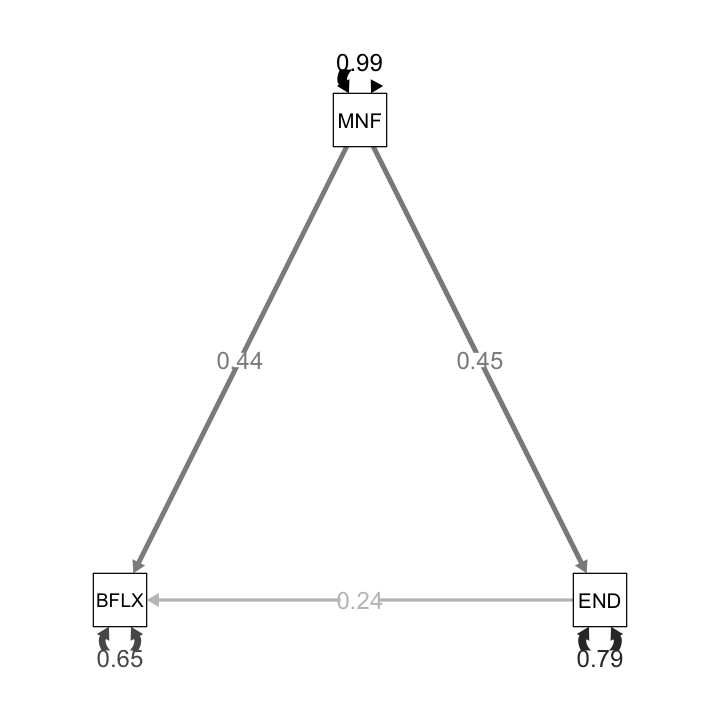

In [18]:
semPlot::semPaths(
    fit, "std",
    layout = "tree", sizeMan = 7, sizeInt = 4, style = "ram",
    residuals = TRUE, rotation = 1, intAtSide = FALSE,
    whatLabels = "est", nCharNodes = 0, curvature = 3,
    posCol = c("black"), edge.label.cex = 1.2
)

I coefficienti di percorso sono simili, ma non identici, a quelli trovati con Mplus. 

L'effetto diretto di MNF (Need Frustration) su  BFLX (Body Inflexibility) è uguale a 0.44.  Ma l'effetto totale è $0.44 + 0.45*0.24 = 0.55$. L'effetto di mediazione è uguale a $0.45*0.24 = 0.109$. L'outout di lavaan fornisce anche gli errori standard e il test che tali effetti siano uguali a zero.

Le correlazioni tra le variabili sono esprimibili nei termini dei coefficienti di percorso.  Per esempio la correlazionetra BFLX e MNF è

In [19]:
.44 + .45*.24

[1] 0.548

La correlazione tra BFLX e END è

In [20]:
.24 + .44*.45

[1] 0.438

L'output di lavaan fornisce anche la porzione di varianza che viene spiegata dalle variabili esogene per le due variabili endogene nel modello.

Per esempio, la varianza spiegata di `END` è

In [21]:
0.45^2

[1] 0.2025

come riportato dall'output di lavaan.  

:::

::: exercise
Continuiamo con l'esempio precedente, discusso da Barbeau, Boileau, Sarr &  Smith (2019) e esaminiamo ora un modello di path analisi più complesso (Fig. 4 di Barbeau et al., 2019). Usando la sintassi di lavaan, il modello diventa

In [22]:
# BFLX – Body Inflexibility,
# END – Endorsement of Societal Beliefs about Thinness and Obesity,
# MNS – Mean Need Satisfaction, 
# MNF – Mean Need Frustration, 
# BULS – Bulimic Symptoms
mod <- "
  BULS ~ MNF + BFLX
  BFLX ~ END + MNF
  END ~ MNS + MNF
"

Adattiamo il modello ai dati.

In [23]:
fit <- sem(
  mod,
  sample.cov = dat_cov,
  sample.nobs = 192
)

Esaminiamo la soluzione ottenuta.

In [24]:
summary(fit, fit.measures = TRUE, standardized = TRUE, rsquare = TRUE) |>
    print()

lavaan 0.6.15 ended normally after 1 iteration

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         9

  Number of observations                           192

Model Test User Model:
                                                      
  Test statistic                                 8.229
  Degrees of freedom                                 3
  P-value (Chi-square)                           0.042

Model Test Baseline Model:

  Test statistic                               239.501
  Degrees of freedom                                 9
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.977
  Tucker-Lewis Index (TLI)                       0.932

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)               -700.169
  Loglikelihood unrestricted model (H1)       -696

Generiamo il diagramma di percorso.

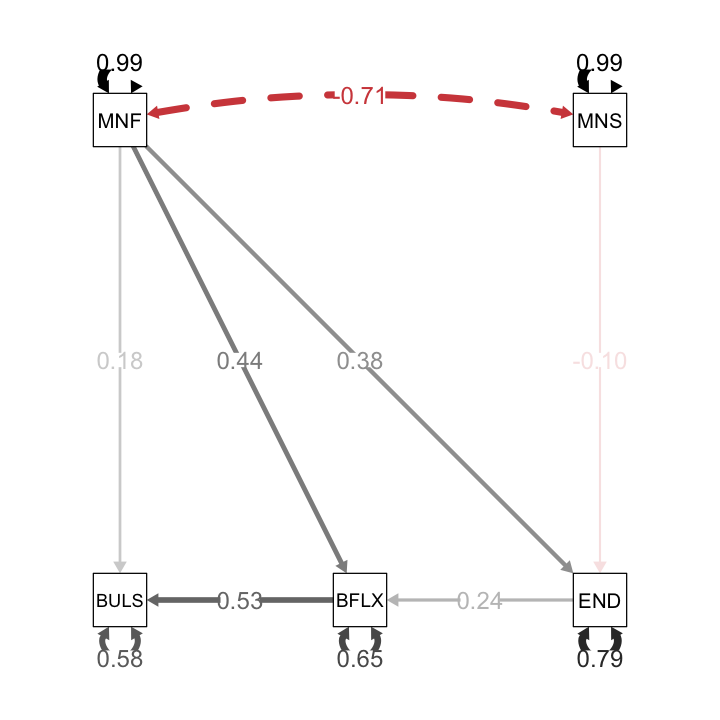

In [25]:
semPlot::semPaths(
    fit, "std",
    layout = "tree", sizeMan = 7, sizeInt = 4, 
    residuals = TRUE, rotation = 1, intAtSide = FALSE,
    whatLabels = "est", nCharNodes = 0, curvature = 3,
    posCol = c("black"), edge.label.cex = 1.2
)

Anche in questo caso i coefficienti di percorso sono simili, ma non identici, a quelli riportati da Barbeau et al. (2019). Gli autori riportano una varianza spiegata di END pari a 0.209; con lavaan si ottiene 0.208.  Per BFLX gli autori riportano 0.292; lavaan ottiene 0.349. Per BULS gli autori riportano 0.478; con lavaan si ottiene 0.419. 

** Esercizio.** Weiss,  Forkus,  Contractor, e Schick (2018) esaminano con una path analisi la relazione tra la difficiltà di regolare le emozioni positive e l'abuso di alcol e di sostanze. 

- La difficoltà di regolare le emozioni positive viene misurata con la  *Difficulties in Emotion Regulation Scale – Positive* (DERS-P; Weiss, Gratz, & Lavender, 2015), che comprende le sottoscale di Acceptance, Impulse, e Goals.
- L'abuso di sostanze viene misurato con la *Drug Abuse Screening Test* (DAST; Skinner, 1982).
- L'abuso di alcol viene misurato con la *Alcohol Use Disorder Identification Test* (AUDIT; Saunders, Aasland, Babor, De la Fuente, & Grant, 1993), con le sottoscale di Hazardous Consumption, Dependence, e Consequences. 

I dati di un campione di 284 partecipanti sono riportati nella forma di una matrice di correlazione.

In [26]:
lower <- '
   1
   .38 1
   .41 .64 1
   .34 .44 .30 1
   .29 .12 .27 .06 1
   .29 .22 .20 .17 .54 1
   .30 .15 .23 .09 .73 .69 1
'

In [27]:
dat_cov <- lavaan::getCov(
  lower, 
  names=c("dmis","con", "dep", "consu", "acc", "goal", "imp"))
dat_cov

,dmis,con,dep,consu,acc,goal,imp
dmis,1.00,0.38,0.41,0.34,0.29,0.29,0.30
con,0.38,1.00,0.64,0.44,0.12,0.22,0.15
dep,0.41,0.64,1.00,0.30,0.27,0.20,0.23
consu,0.34,0.44,0.30,1.00,0.06,0.17,0.09
acc,0.29,0.12,0.27,0.06,1.00,0.54,0.73
goal,0.29,0.22,0.20,0.17,0.54,1.00,0.69
imp,0.30,0.15,0.23,0.09,0.73,0.69,1.00


I dati vengono analizzati con due modelli di path analysis. Nel primo modello si ipotizza che la difficoltà di regolare le emozioni positive sia una variabile esogena che influenza sia l'abuso di sostanze sia l'abuso di alcol. Si ipotizza inoltre che abuso di sostanze e abuso di alcol siano correlate.

La difficoltà di regolare le emozioni positive è indicata da `drpe`; l'abuso di alcolo è denotato da `amis`; l'abuso di sostanze è denotato da `dmis`. 

In [28]:
mod <- '
  drpe =~ NA*acc + goal + imp
  amis =~ NA*con + dep + consu
  amis ~ drpe
  dmis ~ drpe
  dmis ~~ amis
  drpe ~~ 1*drpe
  amis ~~ 1*amis
'

Svolgiamo l'analisi statistica con `sem()`.

In [29]:
fit <- lavaan::sem(mod, sample.cov = dat_cov, sample.nobs = 284)

Esaminiamo i risultati.

In [30]:
summary(fit, fit.measures = TRUE, standardized = TRUE, rsquare = TRUE) |>
    print()

lavaan 0.6.15 ended normally after 18 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        16

  Number of observations                           284

Model Test User Model:
                                                      
  Test statistic                                38.211
  Degrees of freedom                                12
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                               741.324
  Degrees of freedom                                21
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.964
  Tucker-Lewis Index (TLI)                       0.936

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -2465.787
  Loglikelihood unrestricted model (H1)      -24

Creiamo un path diagram.

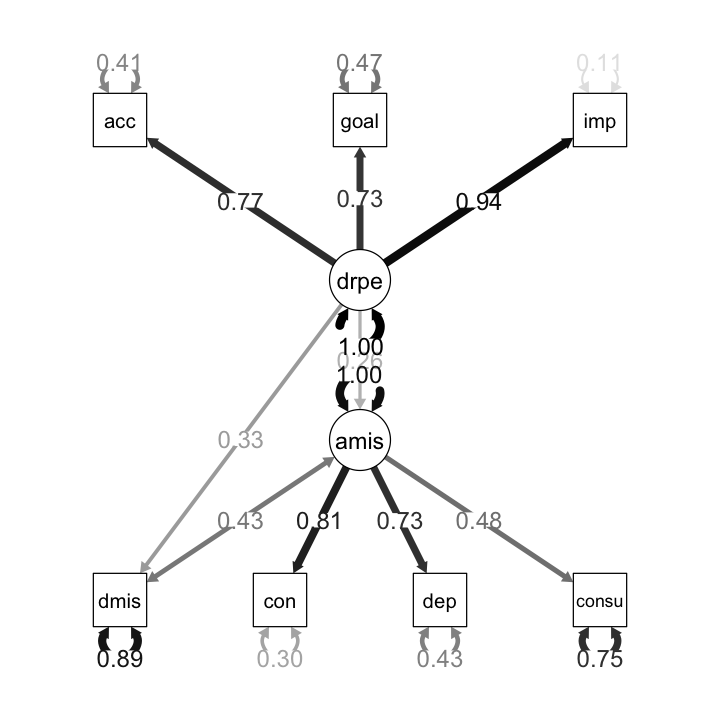

In [31]:
semPlot::semPaths(
    fit, "std",
    layout = "tree", sizeMan = 7, sizeInt = 4, 
    residuals = TRUE, rotation = 1, intAtSide = FALSE,
    whatLabels = "est", nCharNodes = 0, curvature = 3,
    posCol = c("black"), edge.label.cex = 1.2
)

Gli autori esplorano un modello alternativo nel quale le relazioni causali vengono rovesciate: in questo caso è la difficoltà di regolazione delle emozioni positive ad essere la variabile esogena, e l'abuso di sostanze e l'abuso di alcol sono le variabili esogene.

In [32]:
mod_alt <- '
  drpe =~ NA*acc + goal + imp
  amis =~ NA*con + dep + consu
  drpe ~ amis + dmis
  dmis ~~ amis
  drpe ~~ 1*drpe
  amis ~~ 1*amis
'

Adattiamo il modello ai dati.

In [33]:
fit_alt <- sem(mod_alt, sample.cov = dat_cov, sample.nobs = 311)

Esaminiamo i risultati.

In [34]:
summary(fit_alt, fit.measures = TRUE, standardized = TRUE, rsquare = TRUE) |>
    print()

lavaan 0.6.15 ended normally after 19 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        16

  Number of observations                           311

Model Test User Model:
                                                      
  Test statistic                                41.844
  Degrees of freedom                                12
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                               811.802
  Degrees of freedom                                21
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.962
  Tucker-Lewis Index (TLI)                       0.934

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -2700.544
  Loglikelihood unrestricted model (H1)      -26

Creiamo il diagramma di percorso.

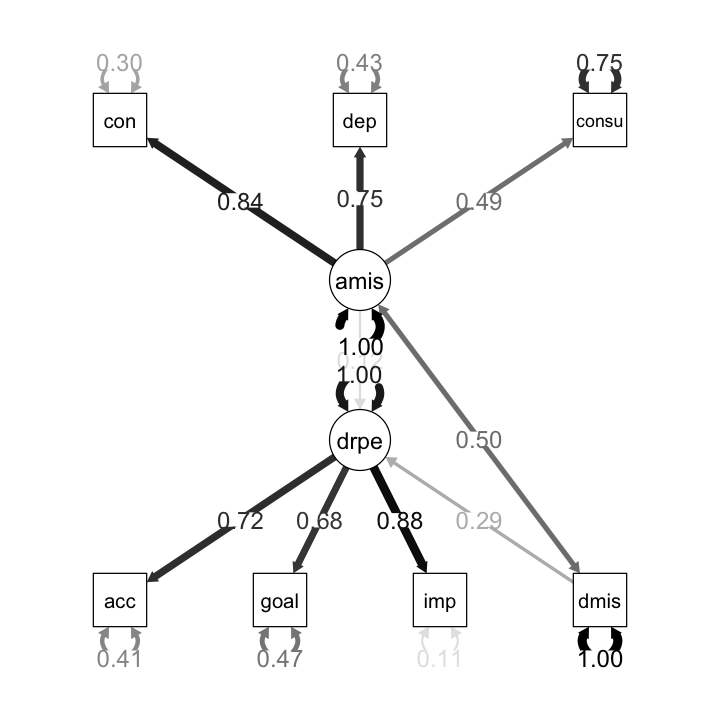

In [35]:
semPlot::semPaths(
    fit_alt, "std",
    layout = "tree", sizeMan = 7, sizeInt = 4, 
    residuals = TRUE, rotation = 1, intAtSide = FALSE,
    whatLabels = "est", nCharNodes = 0, curvature = 3,
    posCol = c("black"), edge.label.cex = 1.2
)


In entrambi i casi i risultati replicano quanto riportato dagli autori.
